# Klastering Kmeans

In [ ]:
#Import Library 
#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [ ]:
dataset = pd.read_csv("C:/Users/asus/Desktop/Semester 5/DSDA/Prak/Prak 9/Produksi_Lele_Provinsi.csv", sep=";")

In [ ]:
#Mengelompokkan data provinsi berdasarkan Volume Produksi
avg_vol = dataset.groupby("Provinsi")["Volume Produksi"].mean()

In [ ]:
print('Rata-rata Volume Produksi Bandeng:\n', avg_vol)

Rata-rata Volume Produksi Bandeng:
 Provinsi
ACEH                            7131.680000
BALI                            2647.499091
BANTEN                         12919.840909
BENGKULU                       14734.275455
DAERAH ISTIMEWA YOGYAKARTA     33729.860909
DKI JAKARTA                     2048.584545
GORONTALO                       2439.510000
JAMBI                           5193.882727
JAWA BARAT                    221984.767273
JAWA TENGAH                   103942.536364
JAWA TIMUR                    103406.307273
KALIMANTAN BARAT                6632.360000
KALIMANTAN SELATAN              4316.478182
KALIMANTAN TENGAH               3255.587273
KALIMANTAN TIMUR                1178.773636
KALIMANTAN UTARA                 321.238889
KEPULAUAN BANGKA BELITUNG       1172.309091
KEPULAUAN RIAU                  9427.826364
LAMPUNG                        24396.904545
MALUKU                            31.270909
MALUKU UTARA                      28.016364
NUSA TENGGARA BARAT            

In [ ]:
# Metode siku
# Metode siku adalah metode yang digunakan untuk melihat nilai optimal cluster pada suatu data
distorsi = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(avg_vol.values.reshape(-1, 1))
    distorsi.append(kmeanModel.inertia_)

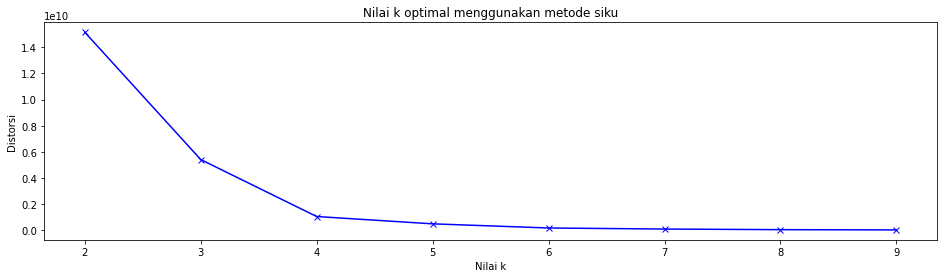

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(K, distorsi, 'bx-')
plt.xlabel('Nilai k')
plt.ylabel('Distorsi')
plt.title('Nilai k optimal menggunakan metode siku')
plt.show()

In [ ]:
# Penjelasan metode siku di atas
# Terlihat bahwa siku terbentuk di nilai k=4, jadi nilai optimal kluster pada data di atas adalah 4

# =====================================================================================================
# Karena nilai optimal kluster = 4 maka parameter n_clusters pada fungsi KMeans dapat diisi dengan value 4
#Implementasi Clustering
clustering = KMeans(n_clusters=4, init="random", n_init=1)
clusters=clustering.fit_predict(avg_vol.values.reshape(-1, 1))

In [ ]:
print('\nHasil clustering:\n', clusters)


Hasil clustering:
 [0 0 0 0 2 0 0 0 3 1 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2]


In [ ]:
#Interpretasi hasil Clustering
#Membuat dataframe hasil clustering
avg_vol=pd.DataFrame({'Provinsi':avg_vol.index, 'Rata-Rata Vol':avg_vol.values, 'Cluster':clusters})

In [ ]:
centroid_perdata=avg_vol.groupby('Cluster')['Rata-Rata Vol'].transform('mean')
centroid=np.unique(centroid_perdata)

In [ ]:
sorted_centroid=np.sort(centroid)
Level4, Level3, Level2, Level1 = sorted_centroid[0], sorted_centroid[1], sorted_centroid[2], sorted_centroid[3]
category=centroid_perdata.map({Level4:'Level 4', Level3:'Level 3', Level2:'Level 2', Level1:'Level 1'})
avg_vol['Category']=category

In [ ]:
#Mencetak interpretasi Clustering
print(avg_vol[["Provinsi", "Category"]])

                      Provinsi Category
0                         ACEH  Level 4
1                         BALI  Level 4
2                       BANTEN  Level 4
3                     BENGKULU  Level 4
4   DAERAH ISTIMEWA YOGYAKARTA  Level 3
5                  DKI JAKARTA  Level 4
6                    GORONTALO  Level 4
7                        JAMBI  Level 4
8                   JAWA BARAT  Level 1
9                  JAWA TENGAH  Level 2
10                  JAWA TIMUR  Level 2
11            KALIMANTAN BARAT  Level 4
12          KALIMANTAN SELATAN  Level 4
13           KALIMANTAN TENGAH  Level 4
14            KALIMANTAN TIMUR  Level 4
15            KALIMANTAN UTARA  Level 4
16   KEPULAUAN BANGKA BELITUNG  Level 4
17              KEPULAUAN RIAU  Level 4
18                     LAMPUNG  Level 3
19                      MALUKU  Level 4
20                MALUKU UTARA  Level 4
21         NUSA TENGGARA BARAT  Level 4
22         NUSA TENGGARA TIMUR  Level 4
23                       PAPUA  Level 4


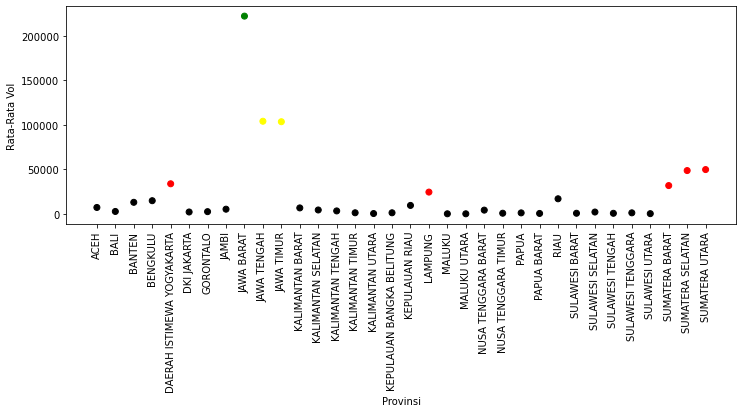

In [ ]:
#Visualisasi interpretasi Clustering
x=avg_vol.index
y=avg_vol['Rata-Rata Vol']
colors={'Level 4':'black', 'Level 3':'red', 'Level 2':'yellow', 'Level 1':'green'}
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x, y, c=avg_vol['Category'].apply(lambda x:colors[x]))
plt.xlabel('Provinsi')
plt.ylabel('Rata-Rata Vol')
plt.xticks(x, avg_vol['Provinsi'], rotation=90)
plt.show()

In [ ]:
Bandeng Tertinggi Jatim, Sumsel, Jabar, Jateng grup 1
grup 2 Sumsel, Aceh, Kalsel

# Klastering Alggomerative

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
dataset = pd.read_csv("C:/Users/asus/Desktop/Semester 5/DSDA/Prak/Prak 9/Produksi_Lele_Provinsi.csv", sep=";")

In [ ]:
#Mengelompokkan data provinsi berdasarkan Volume Produksi
avg_vol = dataset.groupby("Provinsi")["Volume Produksi"].mean()

In [ ]:
print('Rata-rata Volume Produksi Bandeng:\n', avg_vol)

Rata-rata Volume Produksi Bandeng:
 Provinsi
ACEH                            7131.680000
BALI                            2647.499091
BANTEN                         12919.840909
BENGKULU                       14734.275455
DAERAH ISTIMEWA YOGYAKARTA     33729.860909
DKI JAKARTA                     2048.584545
GORONTALO                       2439.510000
JAMBI                           5193.882727
JAWA BARAT                    221984.767273
JAWA TENGAH                   103942.536364
JAWA TIMUR                    103406.307273
KALIMANTAN BARAT                6632.360000
KALIMANTAN SELATAN              4316.478182
KALIMANTAN TENGAH               3255.587273
KALIMANTAN TIMUR                1178.773636
KALIMANTAN UTARA                 321.238889
KEPULAUAN BANGKA BELITUNG       1172.309091
KEPULAUAN RIAU                  9427.826364
LAMPUNG                        24396.904545
MALUKU                            31.270909
MALUKU UTARA                      28.016364
NUSA TENGGARA BARAT            

In [ ]:
# Implementasi Clustering
# Karena nilai optimal kluster pada metode siku sebelumnya klaster = 4 maka parameter n_clusters pada fungsi AgglomerativeClustering dapat diisi dengan value 4
clustering=AgglomerativeClustering(n_clusters=4, linkage='average')
clusters=clustering.fit_predict(avg_vol.values.reshape(-1, 1))

In [ ]:
print('\nHasil clustering:\n', clusters)


Hasil clustering:
 [1 1 1 1 0 1 1 1 3 2 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]


In [ ]:
#Interpretasi Hasil Clustering
#Membuat dataframe hasil clustering
avg_vol=pd.DataFrame({'Provinsi':avg_vol.index, 'Rata-Rata Vol':avg_vol.values, 'Cluster':clusters})

In [ ]:
centroid_perdata=avg_vol.groupby('Cluster')['Rata-Rata Vol'].transform('mean')
centroid=np.unique(centroid_perdata)

In [ ]:
sorted_centroid=np.sort(centroid)
Level4, Level3, Level2, Level1 = sorted_centroid[0], sorted_centroid[1], sorted_centroid[2], sorted_centroid[3]
category=centroid_perdata.map({Level4:'Level 4', Level3:'Level 3', Level2:'Level 2', Level1:'Level 1'})
avg_vol['Category']=category

In [ ]:
#Mencetak interpretasi Clustering
print(avg_vol[["Provinsi", "Category"]])

                      Provinsi Category
0                         ACEH  Level 4
1                         BALI  Level 4
2                       BANTEN  Level 4
3                     BENGKULU  Level 4
4   DAERAH ISTIMEWA YOGYAKARTA  Level 3
5                  DKI JAKARTA  Level 4
6                    GORONTALO  Level 4
7                        JAMBI  Level 4
8                   JAWA BARAT  Level 1
9                  JAWA TENGAH  Level 2
10                  JAWA TIMUR  Level 2
11            KALIMANTAN BARAT  Level 4
12          KALIMANTAN SELATAN  Level 4
13           KALIMANTAN TENGAH  Level 4
14            KALIMANTAN TIMUR  Level 4
15            KALIMANTAN UTARA  Level 4
16   KEPULAUAN BANGKA BELITUNG  Level 4
17              KEPULAUAN RIAU  Level 4
18                     LAMPUNG  Level 3
19                      MALUKU  Level 4
20                MALUKU UTARA  Level 4
21         NUSA TENGGARA BARAT  Level 4
22         NUSA TENGGARA TIMUR  Level 4
23                       PAPUA  Level 4


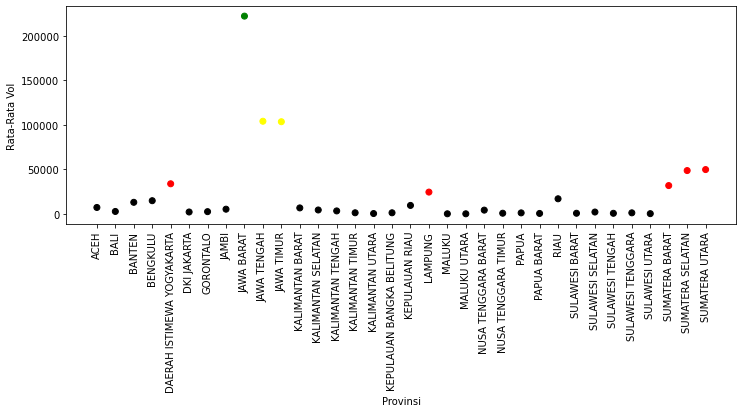

In [ ]:
#Visualisasi Klastering
x=avg_vol.index
y=avg_vol['Rata-Rata Vol']
colors={'Level 4':'black', 'Level 3':'red', 'Level 2':'yellow', 'Level 1':'green'}
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x, y, c=avg_vol['Category'].apply(lambda x:colors[x]))
plt.xlabel('Provinsi')
plt.ylabel('Rata-Rata Vol')
plt.xticks(x, avg_vol['Provinsi'], rotation=90)
plt.show()